In [168]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 한글을 포함한 csv 여는 방법

In [143]:
data = pd.read_csv("./신용도데이터.csv",encoding="cp949")

## 데이터 일부 보기
- 첫번째 10개의 데이터의 추출
- head: 데이터 프레임의 앞부분 일부 내용을 추출

In [144]:
data.head(n=10)

,고객번호,결혼상태,신용카드,주택소유,집세,수입,연령,거주년수,교육년수,고객년수,근무년수,신용도
0,111982034,1,1,0,147.0,353.0,28.0,2,16.0,5.0,5,0
1,112444515,2,1,1,0.0,618.0,37.0,5,16.0,3.0,6,1
2,112690708,0,1,0,146.0,352.0,21.0,1,19.0,7.0,2,1
3,114084953,1,1,0,250.0,600.0,50.0,2,16.0,8.0,9,0
4,115345050,1,1,1,336.0,807.0,41.0,41,22.0,10.0,10,0
5,121066616,0,1,1,144.0,346.0,20.0,20,16.0,3.0,2,0
6,123054075,1,1,0,181.0,436.0,46.0,2,16.0,4.0,4,0
7,125277768,1,1,0,184.0,442.0,35.0,1,16.0,3.0,4,0
8,127665534,1,1,0,194.0,467.0,41.0,1,16.0,4.0,5,0
9,128741962,1,1,0,184.0,443.0,36.0,2,17.0,4.0,8,0


## 한글 폰트 사용 
- rc: 폰트 지정
- rc: minus 부호 오류를 방지하기 위해 사용

In [145]:
plt.rc('font',family="AppleGothic")# 맥
plt.rcParams['axes.unicode_minus'] = False

## 데이터 기초분석(범주형, 연속형)

### csv 파일 정보 확인


In [146]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 12 columns):
고객번호    357 non-null int64
결혼상태    357 non-null int64
신용카드    357 non-null int64
주택소유    357 non-null int64
집세      353 non-null float64
수입      334 non-null float64
연령      329 non-null float64
거주년수    357 non-null int64
교육년수    343 non-null float64
고객년수    348 non-null float64
근무년수    357 non-null int64
신용도     357 non-null int64
dtypes: float64(5), int64(7)
memory usage: 33.5 KB
None


'고객번호, 결혼상태, 신용카드, 주택소유'의 타입은 'int'형이라 연속형 같지만 평균을 구할 수 없어 범주형에 속한다. 

다음 중 결혼상태만 보자면, 결혼상태의 데이터내 중복된 원소 제거 후 유일한 원소를 뽑아내면 '0,1,2'이다. 따라서 '결혼상태'은 범주형이다.
만약 데이터분석일시에는 object로 바꾸어주면 좋고, 머신러닝으로 할시에는 one_hot으로 해주면 좋다. 

In [147]:
print(np.unique(data['결혼상태']))

[0 1 2]


In [148]:
print(data.shape)

(357, 12)


- **데이터 종류**: 
    - 범주형 데이터(int64, float64): 
        - 고객번호
        - 결혼상태    
        - 신용카드    
        - 주택소유    
    - 범주형 속성(object, category): 
        - 집세
        - 수입      
        - 연령      
        - 거주년수    
        - 교육년수    
        - 고객년수    
        - 근무년수    
        - 신용도     

___
- **데이터의 샘플 개수**: 357
___
- **데이터 형태**: (357, 12)
___

## 데이터 클린징
- 노이즈 데이터: nan(결측치), noise(이상치)
- 방법: 대체, 삭제

## 결측데이터
- nan값으로 값이 없는 상태를 나타낸다. 
- 결측값을 처리방법
    - 제거
    - 대체: 주로 평균을 이용해서 대체하지만, 모델을 이용해서 예측한 값을 대체하는 방법도 있다.
    - 연속형 데이터의 null값은 mean, std등으로 대체 가능하지만, 범주형에서는 적용되지 않아 따로 넣어 주어야 한다.
    
- 함부로 결측치를 제거및 대체하면 데이터 왜곡이 발생하기 때문에 신중하게 생각해야하며 원본 데이터를 별도로 백업보관해야한다.

### 결측치 확인

In [149]:
data.isnull().sum()

고객번호     0
결혼상태     0
신용카드     0
주택소유     0
집세       4
수입      23
연령      28
거주년수     0
교육년수    14
고객년수     9
근무년수     0
신용도      0
dtype: int64

___
- **결측치**: 수입, 연령, 교육년수, 고객년수에 존재
___

### 행의 개수에 비해 nan의 개수가 적으므로 평균으로 대체한다.

In [150]:
data = data.fillna(data.mean())

In [151]:
data.isnull().sum()

고객번호    0
결혼상태    0
신용카드    0
주택소유    0
집세      0
수입      0
연령      0
거주년수    0
교육년수    0
고객년수    0
근무년수    0
신용도     0
dtype: int64

### 이상치 탐색

### 밑의 함수는 자동으로 정상범위의 안에 있는 값만 추출해서 다시 박스플롯을 그리고  평균과 중앙값의 차이를 보여준다.

In [152]:
def box_plot(data,selected_column):   
    q1 = data[selected_column].describe()['25%']
    q3 = data[selected_column].describe()['75%']
    iqr = (q3 - q1)

    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    plt.title(selected_column+' 데이터에서 이상치 삭제 전')
    plt.boxplot(data.dropna()[selected_column],vert=0)
    plt.axvline(np.mean(data.dropna()[selected_column]),color='r',label='평균값',linestyle='--')
    plt.legend()

    print('이상치 삭제전 |평균-중앙값|:',round(
          np.abs(np.mean(data.dropna()[selected_column])-np.median(data.dropna()[selected_column])),4))

    plt.subplot(1,2,2)
    plt.title(selected_column+' 데이터에서 이상치 삭제 후')


    left_whiskers = (data[selected_column]>=q1-1.5*iqr)
    right_whiskers = (data[selected_column]<=q3+1.5*iqr)
    datas = (data.dropna()[left_whiskers&right_whiskers])[selected_column]
    plt.boxplot(datas,vert=0)
    plt.axvline(np.mean(datas),color='r',linestyle='--',lw=2.0,label='평균값')
    plt.legend()
    print('이상치 삭제후 |평균-중앙값|:',round(np.abs(np.mean(datas)-np.median(datas)),4))
    plt.show()
    


이상치 삭제전 |평균-중앙값|: 101.3229
이상치 삭제후 |평균-중앙값|: 0.8862


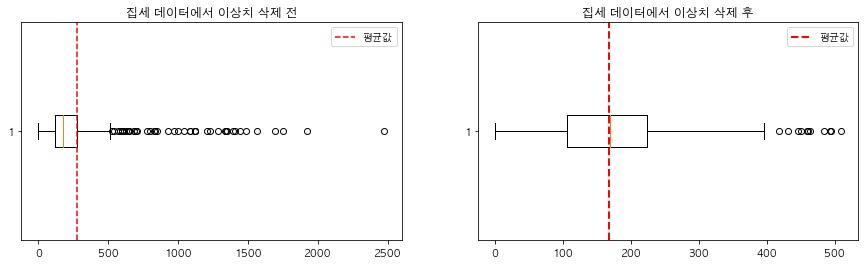

In [153]:
box_plot(data,"집세")

> ## 그래프 분석
**이상치 제거 전 평균과 중위값의 차이: 101.3229**<br>
**이상치 제거 후 평균과 중위값의 차이: 0.8862**<br>
    - 이상치가 상대히 많다.
    - 이렇게 이상치를 빼면 평균과 중위값의 차이가 줄어드는 것을 알 수 있다.
    - 평균은 이상치에 대해 민감하기 때문에 이러한 결과가 발생하는 것이다.

## 데이터 탐색

### 데이터 구간화 
- 연속형 변수를 일정구간한 구간으로 나누어 범주형 변수로 만드는 방법
![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DEAF3B5C1E4AAA1E)

In [154]:
cut = pd.cut(data['연령'],3)

In [155]:
data['수입'].groupby(cut).agg(['mean'])

,mean
연령,
"(17.934, 40.0]",392.813345
"(40.0, 62.0]",578.493014
"(62.0, 84.0]",686.474850


연령에 따른 수입을 보았을때 62에서 84의 노인층에 해당하는 사람이 가장 수입이 높고, 반대로 17에서 40사이의 젊은 층의 수입이 가장 낮다.

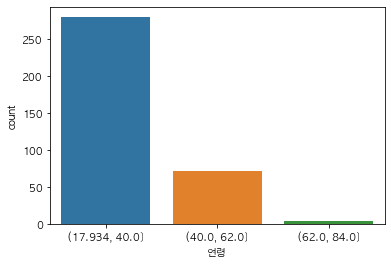

In [156]:
sns.countplot(cut)

### 피봇테이블
######  피봇테이블<a id="chapter-1"></a>
- 많은 양의 데이터에서 필요한 자료함을 뽑아 새롭게 데이터를 재구성하는 것.
- 사용자가 원하는 대로 데이터를 재구성.
- heatmap그래프에 사용될 수 있다.->범주형 2개를 분석시 교차 분석이 된다.

In [157]:
datas = data.pivot_table(index='결혼상태',columns='주택소유',values='수입',aggfunc=np.mean)

aggfunc : 데이터에 대해 처리할 함수를 넣는다.
- np.mean
- np.sum
- np.size
- np.max
- np.min

In [158]:
datas

주택소유,0,1
결혼상태,,
0,365.770049,343.823529
1,455.442263,490.866980
2,389.219534,429.866667


In [159]:
datas

주택소유,0,1
결혼상태,,
0,365.770049,343.823529
1,455.442263,490.866980
2,389.219534,429.866667


수입는 결혼상태가 기혼이고, 주택소유를 할때 평균적으로 가장 높다.

## 피봇테이블 히트맵으로 시각화 하기
- 피봇테이블을 좀더 직관적으로 보기 위해 히트맵을 사용.
- 히트맵 그래프는 진한색일수록 값이 높고, 얅은색일수록 값이 낮다.

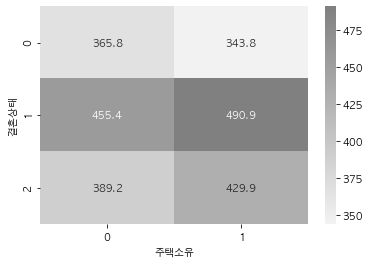

In [160]:
sns.heatmap(data=datas,cmap=sns.light_palette(
    "gray",as_cmap=True),annot=True,fmt=".1f")

In [161]:
data.head()

,고객번호,결혼상태,신용카드,주택소유,집세,수입,연령,거주년수,교육년수,고객년수,근무년수,신용도
0,111982034,1,1,0,147.0,353.0,28.0,2,16.0,5.0,5,0
1,112444515,2,1,1,0.0,618.0,37.0,5,16.0,3.0,6,1
2,112690708,0,1,0,146.0,352.0,21.0,1,19.0,7.0,2,1
3,114084953,1,1,0,250.0,600.0,50.0,2,16.0,8.0,9,0
4,115345050,1,1,1,336.0,807.0,41.0,41,22.0,10.0,10,0


## 막대 그래프
- **집단 별 차이**를 표현 할 때 사용되며, 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현하며 막대 높이의 상대적 길이 차이를 통해 값의 크기를 시각화 함
- 변수 개수에 따른 시각화
    - 일변수: 범주형 데이터 - **카운터플롯(sns.countplot)** : 범주에 따른 개수를 보는 그래프
    - 이변수: (x:범주형, y:연속형) : 바플롯
        - plt.bar(): 범주에 따른 최대 범위를 표시함
        - sns.barplot(): 범주에 따른 평균을 표시함.
            - **estimator**속성를 통해 평균이외의 기능을 사용할 수 있음.

    > ## estimator
    > #### - np.mean() : 평균.
    > #### - np.std() : 표준편차.
    > #### - np.median() : 중앙값.
    > #### - np.max() : 최대값.
    > #### - np.min() : 최소값.
    > #### - np.size() : 크기.
    

### 원하지 않는 속성은 뺴고 시각화를 분석하는 bar_plot 함수

In [162]:
def bar_plots(data,selected_x_column,selected_y_column,remove=None,hue=None):
    """
    remove = none,
    - 필요없는 분석은 뺴는 속성.(mean, std, median, max, min, size,'sum')
    - 리스트로 전달해야됨. ex) remove=['mean', 'median']
    
    hue = none,
    - 카테고리 변수 이름을 지정하여 케테고리 값에 따라 색상을 다르게 할 수 있다.
    - ex) hue="age"
    """
    np_math = {"mean":np.mean, "std":np.std, "sum":np.sum, "size":np.size,"median":np.median,
               "max":np.max, "min":np.min}
    if(remove!=None):
        for i in range(len(remove)):
            np_math.pop(remove[i])
    
    plt.figure(figsize=(20,5*(np.ceil(len(np_math)/3))))
    np_math_name_list = list(np_math.keys())
    for i in range(len(np_math)):
        plt.subplot(np.ceil(len(np_math)/3),3,i+1)
        plt.title(np_math_name_list[i])
        sns.barplot(x=selected_x_column,y=selected_y_column,data=data,
                    estimator=np_math[np_math_name_list[i]],hue=hue)

    plt.show()

In [163]:
data.head()

,고객번호,결혼상태,신용카드,주택소유,집세,수입,연령,거주년수,교육년수,고객년수,근무년수,신용도
0,111982034,1,1,0,147.0,353.0,28.0,2,16.0,5.0,5,0
1,112444515,2,1,1,0.0,618.0,37.0,5,16.0,3.0,6,1
2,112690708,0,1,0,146.0,352.0,21.0,1,19.0,7.0,2,1
3,114084953,1,1,0,250.0,600.0,50.0,2,16.0,8.0,9,0
4,115345050,1,1,1,336.0,807.0,41.0,41,22.0,10.0,10,0


In [164]:
selected_x_column = '주택소유' # 범주형 속성
selected_y_column = '연령' # 연속형 속성
hue = "결혼상태"

### std, min, sum,size기능은 필요없어서 뺐다.

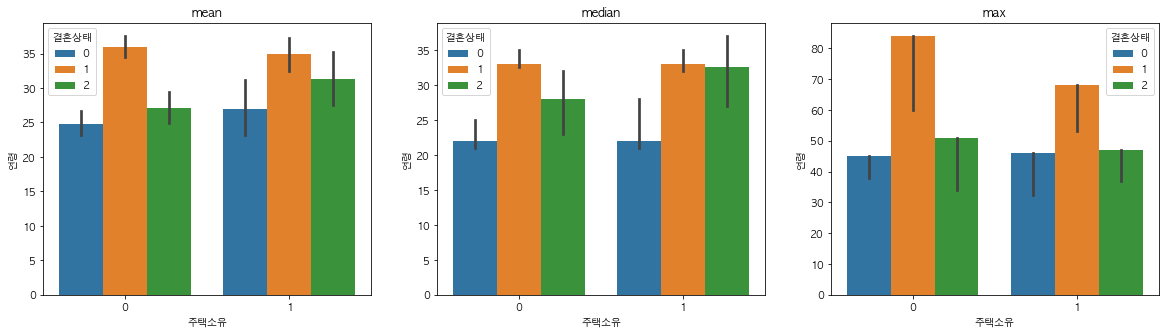

In [165]:
bar_plots(data,selected_x_column,selected_y_column,remove=['std','min','sum','size'],hue=hue)

> ## 그래프 분석
연령의 mean(평균)에서는 주택소유 상관없이 결혼상태일때 높고, 최대값(max)는 주택소유하지않으면서 결혼했을때 연령이 제일 높다. 